In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
%%time
train = pd.read_excel('/content/drive/MyDrive/ATTACKER/FINAL_train_attacker.xlsx')

CPU times: user 34.5 s, sys: 308 ms, total: 34.8 s
Wall time: 37.4 s


In [4]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                                      df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [5]:
train = reduce_mem_usage(train)

Mem. usage decreased to  3.48 Mb (80.0% reduction)


In [6]:
#list = ['Unnamed: 0','Unnamed: 0.1','cat_8']
#data = train.drop(list,axis = 1 )

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45612 entries, 0 to 45611
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         45612 non-null  int32  
 1   label                      45612 non-null  int8   
 2   time_trans                 45612 non-null  float16
 3   cat_1                      45612 non-null  int8   
 4   cat_2                      45612 non-null  int8   
 5   cat_3                      45612 non-null  int8   
 6   cat_5                      45612 non-null  int8   
 7   mul_rate                   45612 non-null  float16
 8   value                      45612 non-null  int32  
 9   cat_6                      45612 non-null  int8   
 10  num_date_review            45612 non-null  int16  
 11  review_value               45612 non-null  int32  
 12  dob                        45612 non-null  int8   
 13  sex                        45612 non-null  int

In [9]:
for i in [train]:
    print(f"\n{i.isnull().sum().sort_values(ascending=False)}")


id                           0
unknown_var_14               0
unknown_var_4                0
unknown_var_5                0
unknown_var_6                0
unknown_var_7                0
unknown_var_8                0
unknown_var_9                0
unknown_var_10               0
unknown_var_11               0
unknown_var_12               0
unknown_var_13               0
unknown_var_15               0
label                        0
unknown_var_16               0
unknown_var_17               0
unknown_var_18               0
unknown_var_19               0
unknown_var_20               0
social_friend_count          0
social_sex_info              0
social_subcriber_count       0
social_location_id           0
current_location_country     0
unknown_var_3                0
unknown_var_2                0
unknown_var_1                0
cat_12                       0
time_trans                   0
cat_1                        0
cat_2                        0
cat_3                        0
cat_5  

In [11]:
data= train

- Binary categorical features: label, sex, sex_social
- Categorical features: (it works as an index)

Distribution of our independent features

In [23]:
list = ['id','label']
X = train.drop(list,axis = 1 )
X.head()

,time_trans,cat_1,cat_2,cat_3,cat_5,mul_rate,value,cat_6,num_date_review,review_value,...,unknown_var_17,unknown_var_18,unknown_var_19,unknown_var_20,social_friend_count,social_sex_info,social_subcriber_count,social_location_id,current_location_country,hometown_location_country
0,0.000000,2,1,1,1,2.259766,3367400,1,0,2643500,...,1801,0,1,3,653,0,0,1,1,1
1,3.681641,1,2,1,0,0.268066,3953600,1,14,2643500,...,1801,0,1,3,0,1,0,1,1,1
2,3.681641,1,2,1,0,0.268066,3953600,1,14,2643500,...,1801,0,1,3,0,0,0,1,1,1
3,3.681641,1,2,1,0,0.268066,3953600,1,14,2643500,...,726,0,1,3,3416,1,625,1,30,1
4,43.250000,2,1,1,1,0.000000,4500000,1,9,2643500,...,1801,2,1,2,0,0,0,1,1,1


In [24]:
y = train.iloc[:, 1].values
print(y)

[0 1 1 ... 0 0 0]


In [25]:
X.columns

Index(['time_trans', 'cat_1', 'cat_2', 'cat_3', 'cat_5', 'mul_rate', 'value',
       'cat_6', 'num_date_review', 'review_value', 'dob', 'sex', 'location_id',
       'cat_7', 'trans_currency', 'job', 'num_trans_last_month', 'cat_9',
       'cat_10', 'cat_11', 'com_type', 'cat_12', 'unknown_var_1',
       'unknown_var_2', 'unknown_var_3', 'unknown_var_4', 'unknown_var_5',
       'unknown_var_6', 'unknown_var_7', 'unknown_var_8', 'unknown_var_9',
       'unknown_var_10', 'unknown_var_11', 'unknown_var_12', 'unknown_var_13',
       'unknown_var_14', 'unknown_var_15', 'unknown_var_16', 'unknown_var_17',
       'unknown_var_18', 'unknown_var_19', 'unknown_var_20',
       'social_friend_count', 'social_sex_info', 'social_subcriber_count',
       'social_location_id', 'current_location_country',
       'hometown_location_country'],
      dtype='object')

feature importance: dùng cho decision tree, XGBoost, random forest

[0.0182227  0.00369631 0.00360352 0.00548993 0.00120595 0.00513323
 0.016519   0.00055579 0.01798887 0.00611675 0.01901143 0.00635063
 0.0064469  0.02681391 0.00363751 0.01471331 0.01104701 0.00336417
 0.01442136 0.00298802 0.02681302 0.01666444 0.04322922 0.04101232
 0.03846602 0.02974229 0.05282831 0.01249572 0.05070228 0.04665026
 0.05107334 0.0401816  0.01310025 0.05068175 0.01587024 0.01750657
 0.01775398 0.00179158 0.04661326 0.04426627 0.01996955 0.02492002
 0.0453544  0.01145109 0.01813046 0.00775665 0.01592549 0.01172331]


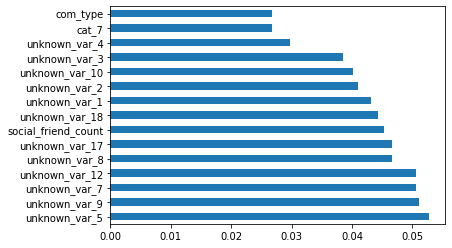

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tress based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh') #lấy 15 biến
plt.show()

Correlation map

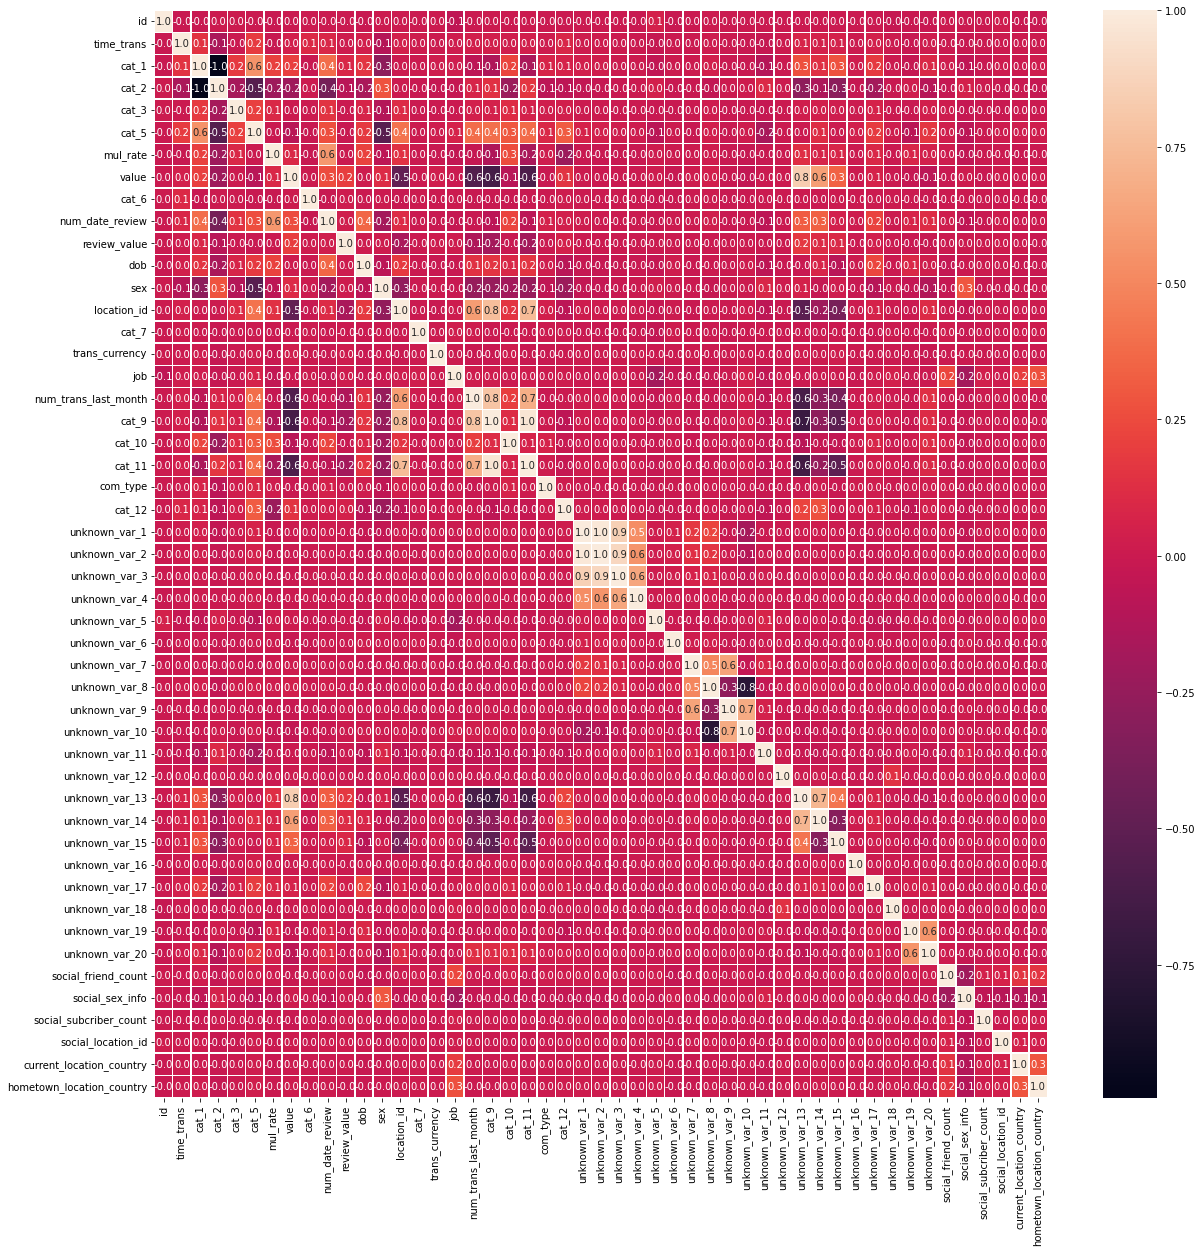

In [21]:
#correlation map
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Tương quan bằng 0 cho hai biến độc lập với nhau. thông thường độ tương quan để sử dụng nằm trong khoảng 0,8 trở lên.
Chọn các biến: cat_1, cat_2, num_trans_last_month, cat_9, unknown_var_1, unknown_var_2, unknown_var_3, unknown_var_8, unknown_var_10

trong đó: 
- cat_1, cat_2, unknown_var_8, unknown_var_10 tác động theo hướng tiêu cực (âm)
- num_trans_last_month, cat_9, unknown_var_1, unknown_var_2, unknown_var_3 tác động theo hướng tích cực (dương)

kiểm tra xem các biến đc chọn đã đúng chưa. Ta sẽ bỏ các biến đó ra khỏi tập biến X và vẽ lại heatmap

In [36]:
drop_list1 = ['cat_1', 'cat_2', 'num_trans_last_month', 'cat_9', 'unknown_var_1', 'unknown_var_2', 'unknown_var_3', 'unknown_var_8', 'unknown_var_10']
x_1 = X.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,time_trans,cat_3,cat_5,mul_rate,value,cat_6,num_date_review,review_value,dob,sex,...,unknown_var_17,unknown_var_18,unknown_var_19,unknown_var_20,social_friend_count,social_sex_info,social_subcriber_count,social_location_id,current_location_country,hometown_location_country
0,0.000000,1,1,2.259766,3367400,1,0,2643500,41,0,...,1801,0,1,3,653,0,0,1,1,1
1,3.681641,1,0,0.268066,3953600,1,14,2643500,32,1,...,1801,0,1,3,0,1,0,1,1,1
2,3.681641,1,0,0.268066,3953600,1,14,2643500,32,1,...,1801,0,1,3,0,0,0,1,1,1
3,3.681641,1,0,0.268066,3953600,1,14,2643500,32,1,...,726,0,1,3,3416,1,625,1,30,1
4,43.250000,1,1,0.000000,4500000,1,9,2643500,33,0,...,1801,2,1,2,0,0,0,1,1,1


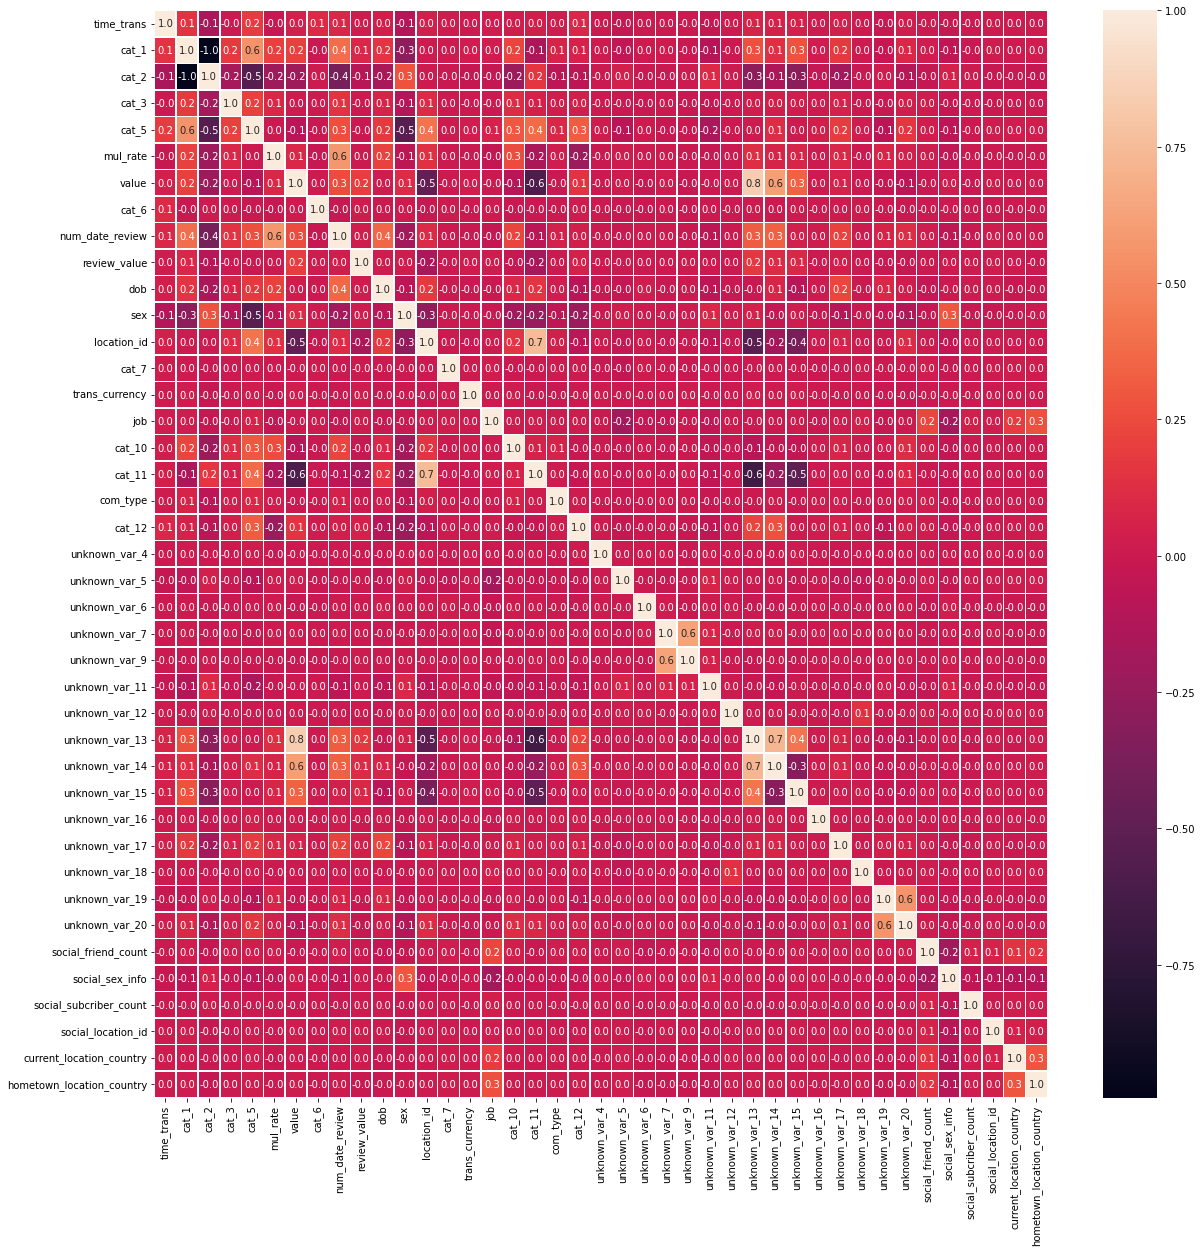

In [35]:
#correlation map
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)